# Hypothesis 1: Longer Reviews Are More Likely To Be Spoilers

In [ ]:
#Importing Needed Libraries
import pymongo
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [ ]:
# Connect to MongoDB and select the database
mongo = pymongo.MongoClient()
mongo_db = mongo.project
# Load the reviews from the reviews collection
data = pd.DataFrame(list(mongo_db.reviews.find({}, {'_id': False})))
#Close the connection
mongo.close()
print(data.shape)

(300639, 11)


In [ ]:
data.head()

,movie,rating,genre,review_date,review_detail,review_id,review_summary,reviewer,spoiler_tag,helpful_upvotes,helpful_total
0,Satisfaction (1988),7,-,26 August 2005,So this is not one of the best movies from the...,rw1158912,Great '80s Comedy!,fechka-1,0,9,13
1,Satisfaction (2007– ),6,-,5 July 2014,Satisfaction is an Australian television serie...,rw3044858,What could have been.,MrFrankCastle,0,2,3
2,Satomi hakken-den (1983),10,-,18 June 2000,good movie but i suggest watching it and prete...,rw0212472,"1 ninja, 1 samurai, and 6 fighter/adventurers ...",fogish,0,6,8
3,Satomi hakken-den (1983),7,-,21 April 2012,"Although based on a classic Japanese novel, Le...",rw2599903,"No, Shinbei... I am your mother.",BA_Harrison,0,5,6
4,Satree lek (2000),9,-,29 April 2001,"From Thailand, this film (winner of two 2001 B...",rw0764409,"Against All Odds, a cross between Rocky & ...",GMeleJr,0,8,9


In [ ]:
#Preparing Data To Ivestigate The Hypothesis
sub_data = pd.DataFrame()
sub_data['movie'] = data['movie']
sub_data['rev_length'] = data['review_detail'].apply(len)
sub_data['spoiler'] = data['spoiler_tag']

sub_data.head()

,movie,rev_length,spoiler
0,Satisfaction (1988),979,0
1,Satisfaction (2007– ),1534,0
2,Satomi hakken-den (1983),499,0
3,Satomi hakken-den (1983),1588,0
4,Satree lek (2000),1070,0


In [ ]:
#Calculation

# Split the data into two groups: shorter reviews and longer reviews
short_reviews = sub_data[sub_data['rev_length'] <= sub_data['rev_length'].median()]
long_reviews = sub_data[sub_data['rev_length'] > sub_data['rev_length'].median()]

# Calculate the spoiler proportions for each group
spoiler_proportion_short = short_reviews['spoiler'].mean()
spoiler_proportion_long = long_reviews['spoiler'].mean()

# Perform a t-test to compare the spoiler proportions of the two groups
t_statistic, p_value = stats.ttest_ind(short_reviews['spoiler'], long_reviews['spoiler'])

# Print the results
print('Spoiler Proportion - Short Reviews:', spoiler_proportion_short)
print('Spoiler Proportion - Long Reviews:', spoiler_proportion_long)
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)


Spoiler Proportion - Short Reviews: 0.13017487864884633
Spoiler Proportion - Long Reviews: 0.31018509274604156
T-Statistic: -122.01921878171534
P-Value: 0.0


obtain a p-value equal to 0, it means that the observed difference in spoiler proportions between shorter and longer reviews is extremely unlikely to occur by chance alone. A p-value of 0 essentially indicates strong evidence against the null hypothesis and suggests a significant difference in spoiler proportions between the two groups.

In practical terms, a p-value of 0 suggests that longer reviews are significantly more likely to contain spoilers compared to shorter reviews. It provides strong support for our hypothesis that longer reviews are associated with a higher probability of spoilers.

The negative t-statistic value of -122 indicates that the mean spoiler proportion in the longer review group is significantly higher than the mean spoiler proportion in the shorter review group. This suggests a strong association between review length and the likelihood of containing spoilers, with longer reviews having a significantly higher spoiler proportion.

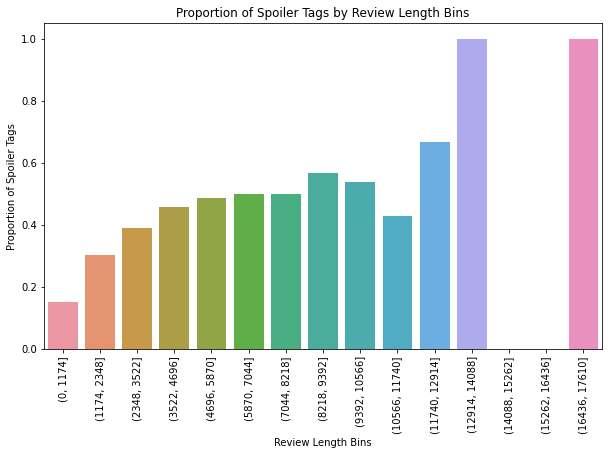

Correlation coefficient: 0.24473574066282278


In [ ]:
#Splitting Data Into Bins Based On The Review’s Length To Visualize The Hypothesis
bin_size= int(sub_data['rev_length'].max()/15)
sub_data['LengthBin'] = pd.cut(sub_data['rev_length'], bins=range(0, sub_data['rev_length'].max() + bin_size,bin_size))

#Calculate The Portion of Spoiler Tags in Each Bin
spoiler_proportion_by_bin = sub_data.groupby('LengthBin')['spoiler'].mean().reset_index()
spoiler_proportion_by_bin = spoiler_proportion_by_bin.rename(columns={'spoiler': 'SpoilerProportion'})

#Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=spoiler_proportion_by_bin, x='LengthBin', y='SpoilerProportion')
plt.xlabel('Review Length Bins')
plt.ylabel('Proportion of Spoiler Tags')
plt.title('Proportion of Spoiler Tags by Review Length Bins')
plt.xticks(rotation=90)
plt.show()

#Calculate the Correlation between lenght and spoiler
correlation = sub_data['rev_length'].corr(sub_data['spoiler'])
print("Correlation coefficient:", correlation)

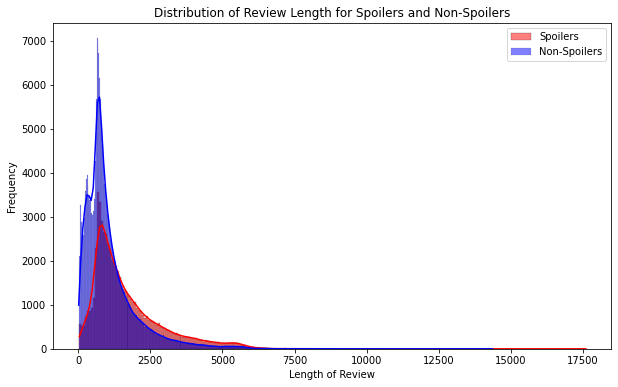

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=sub_data[sub_data['spoiler'] == 1], x='rev_length', kde=True, label='Spoilers', color='red')
sns.histplot(data=sub_data[sub_data['spoiler'] == 0], x='rev_length', kde=True, label='Non-Spoilers' , color='blue')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.title('Distribution of Review Length for Spoilers and Non-Spoilers')
plt.legend()
plt.show()